<a href="https://colab.research.google.com/github/fora22/Data_Science/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machine)
서포트 벡터 머신은 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다. 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합하다.

서포트 벡터 머신은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 다른 머신러닝 분류 모델 또한 결정 경계를 통해 데이터를 분류하지만 서포트 벡터 머신의 특징으로는 '마진'이라는 개념이 있다.

# 마진(Margin)
![image](https://user-images.githubusercontent.com/48875566/127726733-c4d7af70-6ca1-4a02-b8be-4939f594af3b.png)
* [그림 출처](http://hleecaster.com/ml-svm-concept/)

그림에서 실선이 하나 그어져 있는데 이것이 '결정 경계'이다. 그리고 그 실선으로부터 검은 테두리가 있는 빨간점 1개, 파란점 2개까지 영역을 두고 점섬은 그려놓았는데, 결정 경계에서 점선까지의 거리가 바로 마진이다. 그리고 서포트 벡터 머신은 마진을 최대화시켜 최적의 결정 경계를 도출한다.

그림에서 x축과 y축 2개 속성을 가진 데이터로 결정 경계를 그릴 때 3개의 서포트 벡터(선)가 필요했다. 즉, $n$개의 속성을 가진 데이터에는 최소 $n+1$개의 서포트 벡터가 존재한다.


# 소프트 마진 분류
모든 샘플이 도로(선) 바깥쪽에 올바르게 분류되어 있다면 이를 **하드 마진 분류(hard margin classfication)**라고 한다. 이는 두 가지 문제점이 있는데

1. 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며
2. 이상치에 민감하다.

![image](https://user-images.githubusercontent.com/48875566/127726919-7e72cc34-88a0-4bfe-8adc-05ba057d42c6.png)
* [그림 출처](https://analysis-flood.tistory.com/94)

왼쪽 그림에서 처럼 이상치가 존재하면 하드 마진 분류는 불가능하다. 따라서 이런 문제를 피할려면 유연한 모델이 필요하다. 

도로(선)의 폭을 가능한 한 넓게 유지하는 것과 마진 오류(margin violation : 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우) 사이에 적절한 균형을 잡아야 한다. 이를 소프트 마진 분류(soft margin classfication)이라고 한다.



![image](https://user-images.githubusercontent.com/48875566/127727046-bac7d264-43af-49ca-88e5-14fccb6b4d40.png)
* [그림 출처](https://analysis-flood.tistory.com/94)

sklearn의 SVM 모델에서는 $C$ 하이퍼파라미터를 사용해 이 균형을 조절할 수 있다. $C$ 값을 줄이면 도로의 폭이 넓어지지만 마진 오류도 커진다. 반대로 $C$ 값을 크게 하면 마진 오류가 적지만 도로의 폭이 좁아진다.

두 그림을 비교했을 떄 $C=1$일 경우가(마진이 넓을 때, 도로 폭이 넓을 때) 더 잘 일반화될 것이다. 사실 대부분의 마진 오류는 **결정 경계를 기준**으로 올바른 클래스로 분류되기 때문에 이 훈련 세트에서 예측 에러는 마진 오류보다 작다.



In [1]:
# 그래프 한글 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family=font_name)  
fm._rebuild()

NanumBarunGothic


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris['target'] == 2).astype(np.float64)  # Iris-Virginica

In [5]:
svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss='hinge'))
                    ])

In [6]:
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
# 만약 데이터 셋이 아주 커서 메모리에 적재할 수 없거나(외부 메모리 훈련), 온라인 학습으로 분류 문제를 다룰 때는 속도를 조금 포기하고 SGDClassfier()를 사용할 수 있다.
# SGDClassfier(loss = 'hinge', alpha = 1/(m*C))

# 비선형 SVM 분류
선형적으로 분류할 수 없을 때는 여러 가지 방법이 있다.

일단 첫 번째로 다항 특성을 다룰때처럼 사용하는 방법이다.
* Polynomial Regression.ipynb 참고

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [11]:
polynomial_svm_clf = Pipeline([
                               ("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge"))
                               ])

In [12]:
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


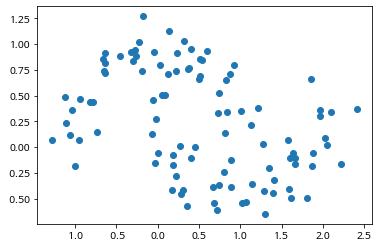

In [13]:
plt.scatter(X[:,0], X[:,1])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


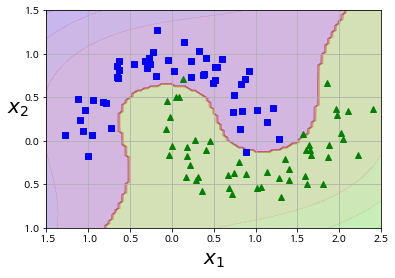

In [24]:
# 출처: https://hoony-gunputer.tistory.com/entry/핸즈온-머신러닝-5강-SVM [후니의 컴퓨터]
def plot_dataset(X, y, axes):
    # dataset 그려주는 함수
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    # 범위 및 grid 그려주는 함수
    x0s = np.linspace(axes[0], axes[1], 100)#axes[0]부터 axes[1]까지 100개로 이루어진 숫자들 
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) #표현할 수 있는 모든 배열조합 
    X = np.c_[x0.ravel(), x1.ravel()]# ravel 1차원 배열로 핀다. 
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# 다항식 커널
다항식 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동한다. 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만든다.

다행히 커널 트릭(kernel trick)이라는 기법을 사용하면 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.

In [25]:
from sklearn.svm import SVC

In [26]:
poly_kernel_svm_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('svm_clf', SVC(kernel='poly', degree = 3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

In [36]:
poly_kernel_svm100_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('svm_clf', SVC(kernel='poly', degree = 10, coef0=100, C=5))
                                # 10차 다항식 커널, coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
])
poly_kernel_svm100_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


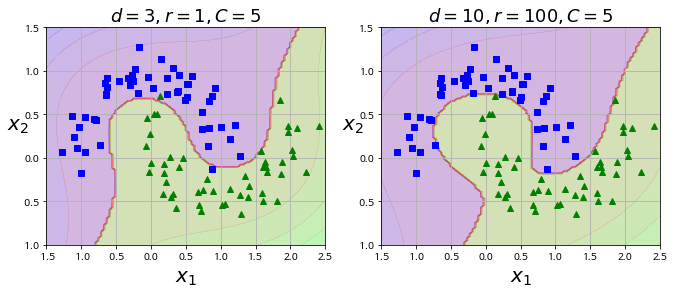

In [37]:
# 모델이 과대적합이라면 다항식의 차수를 줄이고, 과소적합이라면 차수를 늘려야 한다.
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)


plt.subplot(122)
plot_predictions(poly_kernel_svm100_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

# 유사도 특성 추가

비선형 특성을 다루는 또 다른 기법은 각 샢ㅁ으리 특정 랜드마크(landmark)와 얼마나 닮았는지 측정하는 유사도 함수(similarity function)로 계산한 특성을 추가하는 것이다. 

1차원 데이터 셋에 두 개의 랜드마크 $x_1 = -2$와 $x_1=1$을 추가한다. 그리고 $\gamma = 0.3$인 가우시안 방사 기저 함수(Radial Basis Function)를 유사도 함수로 정의한다.
### 가우시안 RBF
$\phi_r(x,l) =  exp(-\gamma||x-l||^2)$

![image](https://user-images.githubusercontent.com/48875566/128585147-76d9e6e6-26fe-423d-95a8-d1cd1ac1b147.png)

$x_1 = 01$ 샘플을 살펴보면, 이 샘플은 첫 번째 랜드마크에서 1만큼 떨어져 있고 두 번째 랜드마크에서 2만큼 떨어져 있다. 그러므로 새로 만든 특성은 $x_2 = exp(-0.3 \times 1^2) \approx 0.74$와 $x_3 = exp(-0.3 \times 2^2) \approx 0.30$이다. 오른쪽 그래프는 변환된 데이터셋을 보여준다. 그림에서 볼 수 있듯이 선형적으로 구분이 가능하다.

랜드마크를 선택하는 방법에 있어서 간단한 방법은 데이터 셋에 있는 모든 샘플 위치에 랜드마크를 설정하는 것이다. 이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높다. 단점은 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다는 것이다(원본 특성은 제외). 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어진다.

# 가우시안 RBF 커널

추가 특성을 모두 계산하려면 연산 비용이 많이 드는데, 커널 트릭으로 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 실제로 특성을 추가하지 않고 얻을 수 있다.

In [38]:
rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


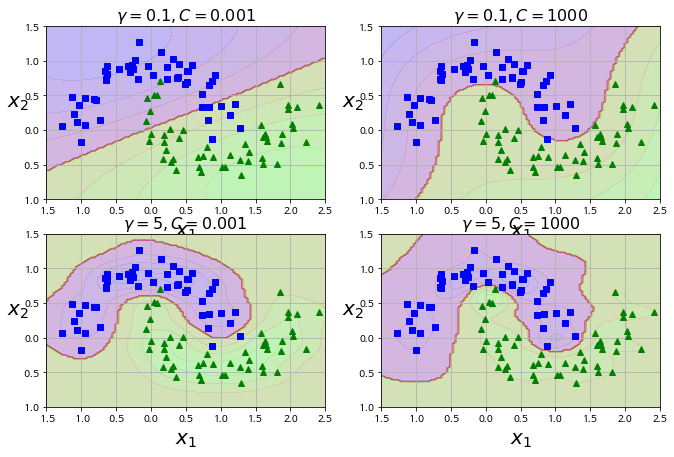

In [40]:
# 출처: https://hoony-gunputer.tistory.com/entry/핸즈온-머신러닝-5강-SVM [후니의 컴퓨터]
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X,  y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)


plt.show()

$\gamma$를 증가시키면 종 모양 그래프가 좁아지고(위에 유사도 특성 그래프 왼쪽) 각 샘플의 영향 범위가 작아진다. 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다. 반대로 작은 $\gamma$ 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워진다.

따라서 모델이 과대적합일 경우 $\gamma$를 감소 시켜야 하고 과소적합일 경우엔 증가시켜야 한다(C와 비슷).

## 다른 커널
다른 커널도 있지만 거의 사용되지 않는다. 예를 들어 어떤 커널은 특정 데이터 구조에 특화되어 있는데 문자열 커널(string kernel)이 가끔 텍스트 문서나 DNA 서열을 분류할 때 사용된다(예를 들면 문자열 서브시퀀스 커널(string subsequence kernel)이나 레벤슈타인 거리(Levenshtein distance)기반의 커널

## 커널 사용
일반적으로 데이터에게 선형 커널을 시도해 봐야한다. 'LinearSVC가 SVC(kernel='linear')보다 훨씬 빠름

특히 훈련 세트가 아주 크거나 특성 수가 많을 경우에 더 그렇다. 훈련 세트가 너무 크지 않다면 가우시안 RBF 커널을 시도해 보는 것이 좋다. 대부분의 경우 이 커널이 잘 들어맞는다.

# 계산 복잡도

|파이썬 클래스|시간 복잡도|외부 메모리 학습 지원|스케일 조정 필요|커널 트릭|
|------|:---:|:---:|:---:|:---:|
|LinearSVC        |$O(m \times n)$                    |No |Yes |No |
|SGDClassifier    |$O(m \times n)$                    |Yes|Yes |No |
|SVC              |$O(m^2 \times n)$ ~ $O(m^3 \times n)$|No |Yes |Yes|

# SVM 회귀

SVM은 선형, 비선형 분류 뿐만 아니라 선형, 비선형 회귀에도 사용 가능하다. 회귀에 적용하는 방법은 목표를 반대로 하는 것이다. 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 대신, 도로 밖의 샘플들이 도로 안에 가능한 한 많은 샘플이 들어가도록 학습하는 것이다.

도로 폭은 $\epsilon$으로 조절한다.

![image](https://user-images.githubusercontent.com/48875566/128585840-6c84e3cd-2ae6-485c-8037-30abb24e14f3.png)

[그림출처](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5%EA%B0%95-SVM)

In [41]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [42]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀버전이다.

LinearSVR은 (LinearSVC처럼) 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어난다. 하지만 SVR은(SVC 처럼) 훈련 세트가 커지면 훨씬 느려진다.